In [1]:
import pandas as pd 
import numpy as np
from plotnine import ggplot, aes, geom_line, geom_point, geom_bar, geom_boxplot
dataframe = pd.read_csv('/home/ruben/Fundamentos-de-Analisis-de-DAtos-I/Practica/Melbourne_housing_FULL.csv')
import scipy.stats as ss
import matplotlib.pyplot as plot
import seaborn as sb
from seaborn import kdeplot
def quartile_skew(x):
  q = x.quantile([.25, .50, .75]) 
  return ((q[0.75] - q[0.5]) - (q[0.5] - q[0.25])) / (q[0.75] - q[0.25])
  

def mostrar_analisis_var_cuantitativas(data):
    #calcular coeficiente de variacion
 datos_variable=pd.DataFrame([{"coeficiente de Variacion":(data.std()/data.mean())*100,\
                 "rango de la variable":data.max() - data.min(),
                 "rango intercuartilico":data.quantile(0.75) - data.quantile(0.25),
                 "coeficiente de asimetria":quartile_skew(data)}])
 return(datos_variable)
       

En primer lugar vamos a realizar una inspeccion ocular del dataset:


In [53]:
dataframe.head()
dataframe2016=dataframe[dataframe["Date"].str[-4:] =='2016']
dataframe2016.describe()
print("precio medio 2016 ",dataframe2016["Price"].mean())
dataframe2017=dataframe[dataframe["Date"].str[-4:] =='2017']
print("precio medio 2017 ",dataframe2017["Price"].mean())
dataframe2017.describe()
dataframe2018=dataframe[dataframe["Date"].str[-4:] =='2018']
print("precio medio 2018 ",dataframe2018["Price"].mean())
dataframe2017.describe()


precio medio 2016  1063226.505338962
precio medio 2017  1051144.058702236
precio medio 2018  1017458.4129014697


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,19852.000000,1.551900e+04,19852.000000,19852.000000,15207.000000,15201.000000,14862.000000,11965.000000,7467.000000,8469.000000,15355.000000,15355.000000,19850.000000
mean,3.075811,1.051144e+06,12.056569,3122.129005,3.146446,1.642655,1.777890,679.551442,163.976758,1968.316330,-37.812436,145.007249,7544.087355
std,0.962574,6.405288e+05,7.402643,120.198924,0.956604,0.717585,1.019618,4505.229729,530.880112,36.666876,0.097739,0.132264,4390.376515
min,1.000000,1.210000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,83.000000
25%,2.000000,6.400000e+05,6.700000,3054.000000,3.000000,1.000000,1.000000,269.000000,104.000000,1950.000000,-37.868645,144.932510,4294.000000
50%,3.000000,8.750000e+05,10.800000,3104.000000,3.000000,2.000000,2.000000,553.000000,137.000000,1970.000000,-37.808930,145.014200,6567.000000
75%,4.000000,1.290000e+06,15.500000,3163.000000,4.000000,2.000000,2.000000,695.000000,188.000000,2000.000000,-37.750495,145.085260,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,16.000000,9.000000,18.000000,433014.000000,44515.000000,2017.000000,-37.395100,145.526350,21650.000000


Vemos que tenemos en total 21 variables algunas con aspecto de ser cualitativas y otras cuantitativas. En los proximos puntos iremos analizando las caracteristitcas de las mismas.
Vemos ne primer lugar el tipo de las variables:

In [3]:
dataframe.dtypes


Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [4]:
aux=pd.DataFrame({"Suburb":pd.value_counts(dataframe['Suburb']),"Method":pd.value_counts(dataframe['Method']),\
                  "Regionname":pd.value_counts(dataframe['Regionname']),"SellerG":pd.value_counts(dataframe['SellerG']),\
                 "Method":pd.value_counts(dataframe['Method']),"CouncilArea":pd.value_counts(dataframe['CouncilArea'])})
aux

,Suburb,Method,Regionname,SellerG,CouncilArea
@Realty,NaN,NaN,NaN,12.0,NaN
A,NaN,NaN,NaN,1.0,NaN
AIME,NaN,NaN,NaN,1.0,NaN
ASL,NaN,NaN,NaN,5.0,NaN
Abbotsford,137.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
iProperty,NaN,NaN,NaN,1.0,NaN
iSell,NaN,NaN,NaN,32.0,NaN
iTRAK,NaN,NaN,NaN,33.0,NaN
viewbank,1.0,NaN,NaN,NaN,NaN


In [5]:
print(dataframe.describe())
aux=pd.DataFrame({"Suburb":dataframe["Suburb"].describe(),"CouncilArea":dataframe["CouncilArea"].describe(),\
                  "Regionname":dataframe["Regionname"].describe(),"SellerG":dataframe["SellerG"].describe(),\
                 "Method":dataframe["Method"].describe()})
aux

              Rooms         Price      Distance      Postcode      Bedroom2  \
count  34857.000000  2.724700e+04  34856.000000  34856.000000  26640.000000   
mean       3.031012  1.050173e+06     11.184929   3116.062859      3.084647   
std        0.969933  6.414671e+05      6.788892    109.023903      0.980690   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.350000e+05      6.400000   3051.000000      2.000000   
50%        3.000000  8.700000e+05     10.300000   3103.000000      3.000000   
75%        4.000000  1.295000e+06     14.000000   3156.000000      4.000000   
max       16.000000  1.120000e+07     48.100000   3978.000000     30.000000   

           Bathroom           Car       Landsize  BuildingArea     YearBuilt  \
count  26631.000000  26129.000000   23047.000000   13742.00000  15551.000000   
mean       1.624798      1.728845     593.598993     160.25640   1965.289885   
std        0.724212      1.010771    3398.841946

,Suburb,CouncilArea,Regionname,SellerG,Method
count,34857,34854,34854,34857,34857
unique,351,33,8,388,9
top,Reservoir,Boroondara City Council,Southern Metropolitan,Jellis,S
freq,844,3675,11836,3359,19744


## 3.3 Análisis y resumen numérico de las variables cualitativas del Dataset

para cada una de las variables cualitativas del dataframe comprobaremos sus medidas de centralidad y veremos cuales de ellas tiene sentido analizar



dataframe.describe()

**Tabla 3.3.1**

### 3.3.1 Analisis de la variable Rooms

Esta variable contiene el número de habitaciones de cada propiedad que hay en la muesta. Como se puede ver en la tabla 3.3.1 la variable tiene valor en 34857 toma valores discretos en el rango 1 a 16 dormitorios, que es el máximo encontrado. La mitad de la muestra tiene tres habitaciones o menos y el 75% de pisos tienen entre 1 y 4 habitaciones.
A continuacion vamos a ver las frecuencias de la variable

In [7]:
pd.value_counts(dataframe['Rooms'])/dataframe["Rooms"].count()


3     0.432739
2     0.239034
4     0.228247
5     0.049832
1     0.042431
6     0.005852
7     0.000918
8     0.000545
10    0.000172
9     0.000115
12    0.000086
16    0.000029
Name: Rooms, dtype: float64

Como se puede ver mas de un 40% de los pisos vendidos tienen 3 dormitorios que es mas del doble del porcentaje del numero de pisos que tiene 2 dormitorios (un 23%) o 4 dormitorios(un 22,8%).

Pasamos a hacer el cálculo de las medidas de dispersión y simetria calcularemos el coficiente de variación, rango, IQR y simtetria:

In [8]:
mostrar_analisis_var_cuantitativas(dataframe["Rooms"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,32.000296,15,2.0,0.0


Como se puede var en la tabla anterio la variable tiene un coeficiente de variacion del 32% con un coeficiente de asimetria positivo. Podemos deducir que la variable es bastante simetrica dado que el coeficiente está muy próximo a 0



/home/ruben/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


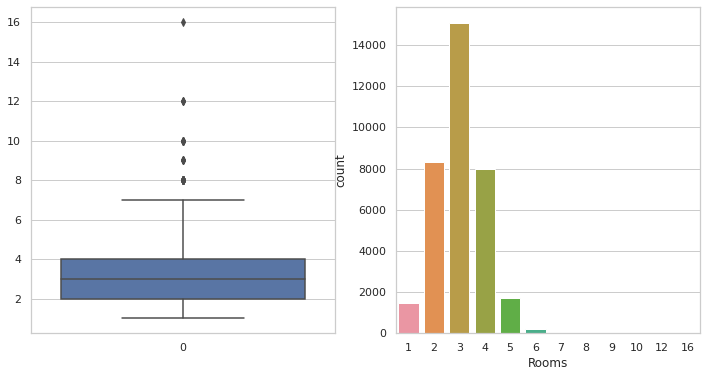

In [31]:
sb.set_theme(style="whitegrid")
fig, (ax1,ax2) = plot.subplots(1,2,figsize=(12,6))
sb.boxplot(data=dataframe["Rooms"],ax=ax1)
sb.countplot(dataframe["Rooms"],ax=ax2)
plot.show()

Como ya se habia comprobado numéricamente la variable es muy simetrica aunque se aprecia unos outliers, viviendas de mas de 7 dormitorios que se deberian eliminar

### 3.3.1 Analisis de la variable Bedroom2
Esta variable contiene el numero de dormitorios de cada propiedad. Como se puede ver en la tabla 3.3.1 la variable tiene valor en 34857 toma valores discretos en el rango 0 a 30 dormitorios, que es el máximo encontrado. La mitad de la muestra tiene tres dormitorios o menos y el 75% de pisos tienen entre 0 y 4 dormitorios. Estas cifras llaman la atencion ya que el máximo numero de habitaciones de la variable rooms tenia como maximo 16, por lo que esos datos puede que estén mal imputados.

In [10]:
pd.value_counts(dataframe['Bedroom2'])/dataframe["Bedroom2"].count()

3.0     0.445983
4.0     0.238288
2.0     0.216854
5.0     0.053566
1.0     0.036261
6.0     0.006306
7.0     0.001126
0.0     0.000638
8.0     0.000488
9.0     0.000188
10.0    0.000150
30.0    0.000038
12.0    0.000038
20.0    0.000038
16.0    0.000038
Name: Bedroom2, dtype: float64

Los resultados son muy parecidos a los obtenidos con la variable Rooms por lo que no es probable que la variable rooms haga referencia tambien a numero de dormitorios y no solo de habitaciones. Como ya ocurria con la variable rooms casi el 89% de las propiedades tiene entre 2 y 4 dormitorios.
Vamos a verificar las medidas de dispersión y asimetria de la variable

In [11]:
mostrar_analisis_var_cuantitativas(dataframe["Bedroom2"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,31.792606,30.0,2.0,0.0


El coeficiente de variacion es muy similar a la variable rooms y con el mismo rango intercuantilico, aunque en este caso el coficiente de asimetria es 0 lo que parece indica que se trata de una distribucion simétrica de los datos. Lo verificaremos con los siguientes diagramas:

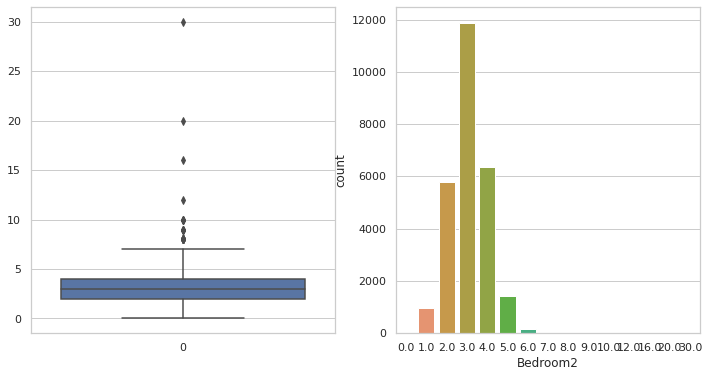

In [30]:
sb.set_theme(style="whitegrid")
fig, (ax1,ax2) = plot.subplots(1,2,figsize=(12,6))
sb.boxplot(data=dataframe["Bedroom2"],ax=ax1)
sb.countplot(x=dataframe["Bedroom2"],ax=ax2)
plot.show()

como ya se habia comprobado numéricamente la variable es muy simetrica aunque se aprecia unos outliers, viviendas de mas de 7 dormitorios que se deberian eliminar. También habra que seleccionar que variable es de mejor calidad para llevar a cabo el modelo.

PRODUCE SESGO

### 3.3.1 Analisis de la variable Distance
Como se puede ver en la tabla 3.3.1 esta variable toma valores entre 0 y 48 millas , el 50% de los pisos de la muestra se encuentran a menos de 10,3 millas del centro de la ciudad y la desviacion tipica es 6,78. 
Calculamos medidas de dispersión y simetriía ya que las de centralidad las hemos visto en la tabla 3.3.1


In [13]:
mostrar_analisis_var_cuantitativas(dataframe["Distance"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,60.696784,48.1,7.6,-0.026316


In [14]:
Vemos la distribucion de la variable y posibles outliers

SyntaxError: invalid syntax (<ipython-input-14-9363e47a0c7d>, line 1)

In [ ]:
sb.set_theme(style="whitegrid")
fig, (ax1,ax2) = plot.subplots(1,2,figsize=(12,6))
sb.histplot(dataframe["Distance"],ax=ax1)
sb.boxplot(data=dataframe["Distance"],ax=ax2)
plot.show()

¿que se ve aqui?

In [ ]:
¿que se ve aqui

## 3.3.1 Analisis de la variable Bathrooms
Como se puede ver en la tabla 3.3.1 la variable tiene valor en 34857 toma valores discretos en el rango 0 a 12 dormitorios, que es el máximo encontrado. El 75% de pisos tienen entre 0 y 2 baños . A continuacion vamos a ver las frecuencias de la variable:

In [17]:
pd.value_counts(dataframe['Bathroom'])/dataframe["Bathroom"].count()

1.0     0.486989
2.0     0.415456
3.0     0.081897
4.0     0.010101
5.0     0.002891
0.0     0.001727
6.0     0.000601
7.0     0.000150
8.0     0.000113
9.0     0.000038
12.0    0.000038
Name: Bathroom, dtype: float64

Como se puede ver en la tabla anterior el 89% de la muestra tiene igual o menos de dos dormitorios comn una media de 1,6 baños. En la tabla 3.3.1 respecto a las medidas de dispersión podemos ver que la desviacion típica es de 0,72 y en la siguiente tabla vemos mas variables de dispersión y asimetria:

In [16]:
mostrar_analisis_var_cuantitativas(dataframe["Bathroom"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,44.572429,12.0,1.0,-1.0


El coeficiente de variación es del 44% y el coeficiente de asimetria es -1 lo que indica que la variable no es simetrica, tiene cola a la derecha. comprobaremos esto mismo de manera visual pintando su histograma y boxplot

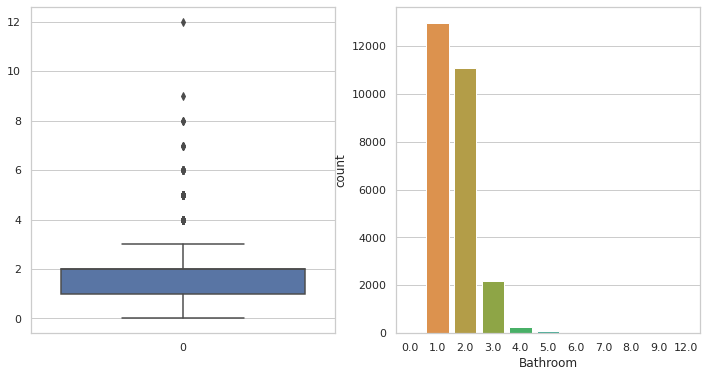

In [29]:
sb.set_theme(style="whitegrid")
fig, (ax1,ax2) = plot.subplots(1,2,figsize=(12,6))
sb.boxplot(data=dataframe["Bathroom"],ax=ax1)
sb.countplot(x=dataframe["Bathroom"],ax=ax2)

plot.show()

### 3.3.1 Analisis de la variable Car

Esta variable contiene el numero de plazas de aparcamiento que tiene asociadas la vivienda Como se puede ver en la tabla 3.3.1 la variable tiene valor en 34857 toma valores discretos en el rango 0 a 26 plazas de aparcamiento. El 75% de pisos tienen entre 0 y 2 plazas de aparcamiento . A continuacion vamos a ver las frecuencias de la variable:


In [23]:
pd.value_counts(dataframe['Car'])/dataframe["Car"].count()

2.0     0.467450
1.0     0.350721
0.0     0.062421
3.0     0.061464
4.0     0.044433
5.0     0.005779
6.0     0.005358
7.0     0.000957
8.0     0.000880
10.0    0.000230
9.0     0.000115
11.0    0.000077
26.0    0.000038
12.0    0.000038
18.0    0.000038
Name: Car, dtype: float64

como se puede ver casi el 47% de las casas de la muestra tienen dos plaza de aparcamiento y el 81% entre 1 y 2 plazas de aparcamiento.Respecto a las medidas de dispersión, en la tabla 3.3.1 podemos ver que la desviacion típica es de 1.01. En la siguiente tabla vemos mas variables de dispersión y asimetria:

In [22]:
mostrar_analisis_var_cuantitativas(dataframe["Car"])

,coeficiente de Variacion,rango de la variable,rango intercuartilico,coeficiente de asimetria
0,58.465078,26.0,1.0,-1.0


como se puede ver hay un coeficiente de variación alto y asimetria por la izquierda que verificaremos mejor haciendo algunos diagramas

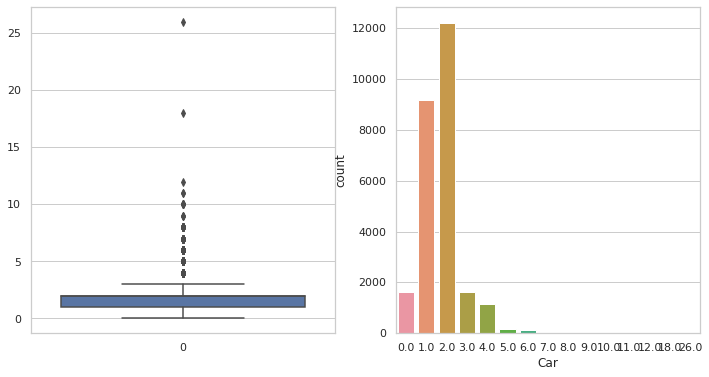

In [28]:
sb.set_theme(style="whitegrid")
fig, (ax1,ax2) = plot.subplots(1,2,figsize=(12,6))
sb.boxplot(data=dataframe["Car"],ax=ax1)
sb.countplot(x=dataframe["Car"],ax=ax2)

plot.show()

### 3.3.1 Analisis de la variable Landsize

Esta variable contiene el numero de plazas de aparcamiento que tiene asociadas la vivienda Como se puede ver en la tabla 3.3.1 la variable tiene valor en 34857 toma valores discretos en el rango 0 a 26 plazas de aparcamiento. El 75% de pisos tienen entre 0 y 2 plazas de aparcamiento . A continuacion vamos a ver las frecuencias de la variable:

### 3.3.1 Analisis de la variable Price
ANALIZAR como cambia el tiempo

Meter el algun calculo de lat y long.